<a href="https://colab.research.google.com/github/ArtuomMerkulov/Hackaton-AI-Challenge/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BD%D0%B0_%D0%BF%D0%BE%D0%B2%D0%B5%D1%80%D1%85%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

## Создание модели, обучение и вывод результатов

Epoch 1/25
331/331 [==============================] - 165s 490ms/step - loss: 998219264.0000 - val_loss: 229135152.0000
Epoch 2/25
331/331 [==============================] - 162s 490ms/step - loss: 147633536.0000 - val_loss: 352633088.0000
Epoch 3/25
331/331 [==============================] - 163s 491ms/step - loss: 135223632.0000 - val_loss: 431038112.0000
Epoch 4/25
331/331 [==============================] - 163s 494ms/step - loss: 128879616.0000 - val_loss: 451072800.0000
Epoch 5/25
331/331 [==============================] - 159s 482ms/step - loss: 123917392.0000 - val_loss: 502898880.0000
Epoch 6/25
331/331 [==============================] - 163s 494ms/step - loss: 118231008.0000 - val_loss: 581315840.0000
Epoch 7/25
331/331 [==============================] - 164s 495ms/step - loss: 113632408.0000 - val_loss: 614398080.0000
Epoch 8/25
331/331 [==============================] - 163s 493ms/step - loss: 110851656.0000 - val_loss: 624288832.0000
Epoch 9/25
331/331 [====================

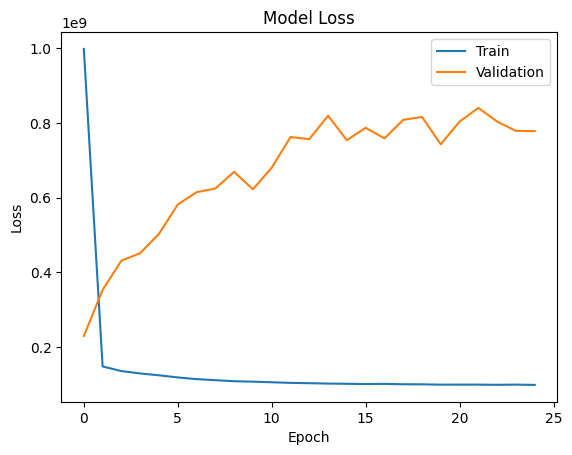

4707/4707 [==============================] - 38s 8ms/step
MSE of the neural network on new data: 779974606.772932
MAE of the neural network on new data: 26463.44877390128
Mean: 68928.47
Standard Deviation: 3907.337


In [3]:
import os
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

# Загрузка данных
def load_data(file_path):
    df = pd.read_csv(file_path)

    if df.empty:
        raise ValueError("Empty dataframe")

    required_columns = ['X', 'Y', 'Z', 'flowVelocity', 'PressureValue']

    if not set(required_columns).issubset(df.columns):
        raise ValueError(f"Missing required columns: {', '.join(required_columns)}")

    Xtrain = df[['X', 'Y', 'Z', 'flowVelocity']].astype(int).values
    Ytrain = df['PressureValue'].astype(int).values

    return Xtrain, Ytrain

# Нормализация данных
def normalize_data(Xtrain):
    mean = np.mean(Xtrain, axis=0)
    std = np.std(Xtrain, axis=0)
    Xtrain_normalized = (Xtrain - mean) / std
    return Xtrain_normalized, mean, std

# Построение модели
def build_model():
    model = models.Sequential([
        layers.Dense(1024, input_dim=4, activation='relu'),
        layers.Dense(2048, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

# Обучение модели
def train_model(model, Xtrain, Ytrain, epochs=25, test_size=0.25, batch_size=1024):
    x_train, x_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=test_size)

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1, shuffle=True)

    return model, history

# Оценка предсказаний модели
def evaluate_predictions(predictions, actual_values):
    mse = mean_squared_error(actual_values, predictions)
    mae = mean_absolute_error(actual_values, predictions)
    print("MSE of the neural network:", mse)
    print("MAE of the neural network:", mae)

# График истории обучения
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Оценка модели на новых данных
def evaluate_model(model, X, Y):
    predictions = model.predict(X)
    mse = mean_squared_error(Y, predictions)
    mae = mean_absolute_error(Y, predictions)
    print("MSE of the neural network on new data:", mse)
    print("MAE of the neural network on new data:", mae)

#  Сохранение весов модели
def save_weights(model, file_path):
    model.save_weights(file_path)

# Загрузка весов
def load_weights(model, file_path):
    model.load_weights(file_path)

# Сводные результаты
def summarize_results(results):
    mean = np.mean(results)
    std = np.std(results)
    print("Mean:", mean)
    print("Standard Deviation:", std)

# Точка входа в программу
def main():
    file_path = os.path.join('dataLuna_2V_true.csv')

    try:
        Xtrain, Ytrain = load_data(file_path)

        # Normalize input data
        Xtrain_normalized, mean, std = normalize_data(Xtrain)

        # Split data into train and test sets
        x_train, x_test, y_train, y_test = train_test_split(Xtrain_normalized, Ytrain, test_size=0.25, random_state=42)

        # Build model
        model = build_model()
        # Train model
        model, history = train_model(model, x_train, y_train, epochs=25, test_size=0.25, batch_size=1024)

        # Evaluate model on train set
        predictions = model.predict(x_test)
        evaluate_predictions(predictions, y_test)

        # Plot training history
        plot_history(history)

        # Save model weights
        save_weights(model, 'model_weights.h5')

        # Load model weights
        model.load_weights('model_weights.h5')

        # Evaluate model on new data
        evaluate_model(model, x_test, y_test)

        # Summarize model results
        summarize_results(predictions)

    except FileNotFoundError:
        print(f"File not found: {file_path}")

    except ValueError as e:
        print(f"Error: {str(e)}")

if __name__ == '__main__':
    main()
